<a href="https://colab.research.google.com/github/ghrbarbosa/AirBnb/blob/main/Analisando_os_Dados_do_Airbnb_(Porto_e_Lisboa).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Porto x Lisboa**: uma comparação do perfil hoteleiro das maiores regiões metropolitanas de Portugal!

Ah, Portugal! Quem não se imagina tirando um belo mês férias em um dos países mais belos do mundo?

Ir à **Lisboa** e visitar a magnífica Torre de Belém comendo os deliciosos legítimos pastéis de Belém, passear por Alfama e vivenciar o melhor da cultura do Fado, e depois conhecer os graciosos palácios de Mafra e da Pena (em Sintra) a poucos quilômetros da cidade?

<center><img alt="Lisboa" width="70%" src="https://s7a5n8m2.stackpathcdn.com/wp-content/uploads/2016/04/lisboa-bairro-alfama.jpg"></center>

Ou quem sabe ir mais ao norte e conhecer a região do **Porto**? Passear de barco no histórico Rio Douro e passar pela famosa ponte Luís I, visitar a inspiradora Livraria Lello e depois tomar um café no Café Majestic... É para deixar *J. K. Rowling* com inveja!

<center><img alt="Lisboa" width="70%" src="http://www.qualviagem.com.br/wp-content/uploads/2019/08/iStock-700954448.jpg"></center>

Independentemente de onde você for, **o turismo é marcante em Portugal** como um todo, e mais do que conhecer as principais atrações turísticas de cada cidade, vale conhecer como funciona o setor hoteleiro dessas regiões, e é isso que vamos fazer agora!

Para conhecermos melhor essas regiões, vamos utilizar as informações do [Airbnb](https://www.airbnb.com.br/), que já é considerado a **maior empresa hoteleira da atualidade!**

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade do Porto e de Lisboa, e ver quais insights podem ser extraídos a partir de dados brutos.**

## **Obtenção dos Dados**

Todas as bases de dados aqui utilizadas foram extraídas da plataforma [*Inside Airbnb*](http://insideairbnb.com/get-the-data.html), que se constituem das informações públicas do site da Airbnb listados:

* `listings.csv` - Summary information and metrics for listings in Porto (good for visualisations).

* `listings.csv` - Summary information and metrics for listings in Lisbon (good for visualisations).


Os dados foram analisados, limpos e agregados quando apropriados para facilitar as análises públicas.

Para mais informações acerca dos métodos aplicados pela empresa, verificar [neste link](http://insideairbnb.com/about.html#disclaimers).


In [ ]:
# Abaixo vamos importar os pacotes necessários para analisarmos as informações

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [ ]:
# Importamos também o arquivo listings.csv (Porto e Lisboa) para os respectivos DataFrames

df_porto = pd.read_csv('http://data.insideairbnb.com/portugal/norte/porto/2020-04-23/visualisations/listings.csv')

df_lisboa = pd.read_csv('http://data.insideairbnb.com/portugal/lisbon/lisbon/2020-04-29/visualisations/listings.csv')

## **Análise dos Dados**

Nesta etapa buscamos apresentar a *estruturação dos dados* e a situação apresentada nas databases.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer etapa, vamos verificar a primeira impressão do nosso *dataset*, analisando as 10 primeiras entradas de cada base utilizada.

In [ ]:
# As primeiras linhas da base do Porto

df_porto.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,41339,Porto city flat near the sea,180050,Paula,PORTO,Lordelo do Ouro e Massarelos,41.15010,-8.66035,Entire home/apt,58,5,17,2018-09-28,0.20,1,164
1,55111,Fontielas Houses |Floor1 in House with shared ...,259711,Isabel E João,PAREDES,Cete,41.17481,-8.35362,Entire home/apt,66,3,14,2019-09-07,0.24,3,0
2,70925,APARTMENT WITH THE BEST CITY VIEW,361205,Miguel,VILA NOVA DE GAIA,Santa Marinha e São Pedro da Afurada,41.13810,-8.61108,Entire home/apt,97,4,57,2019-12-09,0.54,2,308
3,73828,Fontielas Houses |Floor0 in House with shared ...,259711,Isabel E João,PAREDES,Cete,41.17449,-8.35426,Entire home/apt,66,3,8,2019-07-22,0.13,3,0
4,76436,Go2oporto @ River Side,399503,Go2oporto,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.13925,-8.61477,Entire home/apt,91,2,183,2020-03-12,1.78,20,303


In [ ]:
# As primeiras linhas da base de Lisboa

df_lisboa.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,40,3,26,2020-01-03,0.38,1,307
1,25659,"Sunny, Alfama Sleeps 3 - Coeur d'Alfama",107347,Ellie,Lisboa,Santa Maria Maior,38.71167,-9.12696,Entire home/apt,60,3,113,2019-12-08,1.54,1,317
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71272,-9.12628,Entire home/apt,60,3,321,2020-03-11,2.82,1,351
3,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71239,-9.12887,Entire home/apt,60,1,239,2020-03-15,2.47,2,318
4,29720,TheHOUSE - Your luxury home,128075,Francisco,Lisboa,Estrela,38.71195,-9.15877,Entire home/apt,1100,2,55,2020-03-15,0.48,2,300


### **Variáveis**

**Porto**

In [ ]:
# Identificamos então o volume de dados do DataFrame do Porto

print('Entradas:\t {}'.format(df_porto.shape[0]))
print('Variáveis:\t {}'.format(df_porto.shape[1]))

# Em seguida as 5 primeiras entradas do dataset

display(df_porto.dtypes)


Entradas:	 11904
Variáveis:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

**Lisboa**

In [ ]:
# Identificamos então o volume de dados do DataFrame de Lisboa

print('Entradas:\t {}'.format(df_lisboa.shape[0]))
print('Variáveis:\t {}'.format(df_lisboa.shape[1]))

# Em seguida as 5 primeiras entradas do dataset

display(df_lisboa.dtypes)


Entradas:	 24640
Variáveis:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Valores ausentes no *dataset***

A qualidade de um dataset está diretamente correlacionada com a quantidade de **dados faltantes**, por isso, listamos abaixo a relação dos dois casos que estamos estudando.

**Porto**

* Notamos que no caso da cidade do Porto as variáveis `reviews_per_month` e `last_review` possuem cerca de 15,9% de dados faltantes;
* As variáveis `name` e `host_name` apresentaram menos de 0,01% da falta de dados.

In [ ]:
# Encontrando a relação de valores ausentes na base do Porto

df_porto.isnull().sum().sort_values(ascending = False)

reviews_per_month                 1892
last_review                       1892
host_name                            1
name                                 1
availability_365                     0
calculated_host_listings_count       0
number_of_reviews                    0
minimum_nights                       0
price                                0
room_type                            0
longitude                            0
latitude                             0
neighbourhood                        0
neighbourhood_group                  0
host_id                              0
id                                   0
dtype: int64

In [ ]:
# Em seguida medimos a proporção em relação aos valores encontrados

(df_porto.isnull().sum() / df_porto.shape[0]).sort_values(ascending = False)

reviews_per_month                 0.158938
last_review                       0.158938
host_name                         0.000084
name                              0.000084
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

**Lisboa**

* No caso de Lisboa, aproximados 16,9% dos dados das variáveis `reviews_per_month` e `last_review` não foram registrados;
* Menos de 0,07% das informações de `name` não foram preenchidas e `host_name` menos de 0,004%.

In [ ]:
# Encontrando a relação de valores ausentes na base de Lisboa

df_lisboa.isnull().sum().sort_values(ascending = False)

reviews_per_month                 4153
last_review                       4153
name                                19
host_name                            1
availability_365                     0
calculated_host_listings_count       0
number_of_reviews                    0
minimum_nights                       0
price                                0
room_type                            0
longitude                            0
latitude                             0
neighbourhood                        0
neighbourhood_group                  0
host_id                              0
id                                   0
dtype: int64

In [ ]:
# Em seguida medimos a proporção em relação aos valores encontrados

(df_lisboa.isnull().sum() / df_lisboa.shape[0]).sort_values(ascending = False)

reviews_per_month                 0.168547
last_review                       0.168547
name                              0.000771
host_name                         0.000041
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Distribuição das variáveis** 

Para visualizarmos melhor a distribuição dos dados, plotamos abaixo os histogramas de cada cidade.

**Porto**

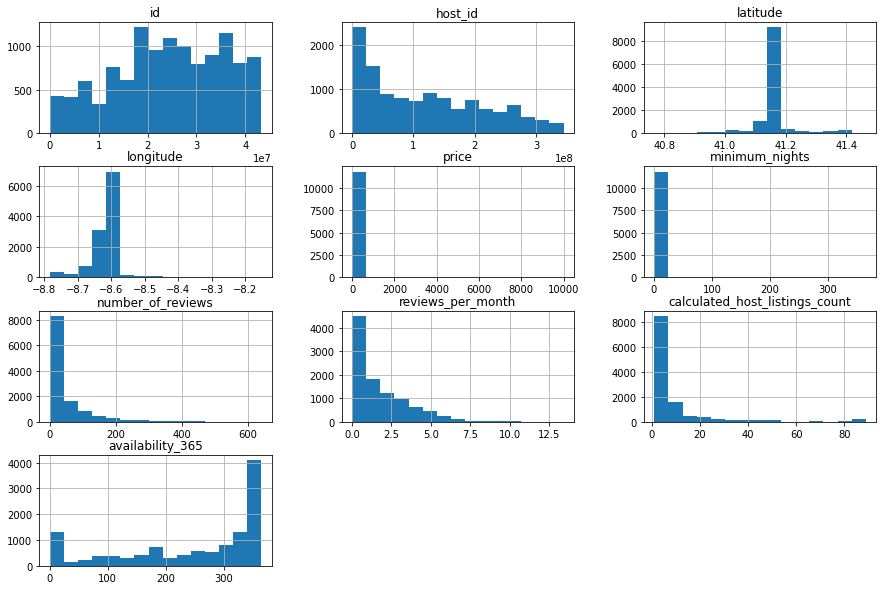

In [ ]:
# Histograma das variáveis numéricas do Porto

df_porto.hist(bins=15, figsize=(15,10));

**Lisboa**

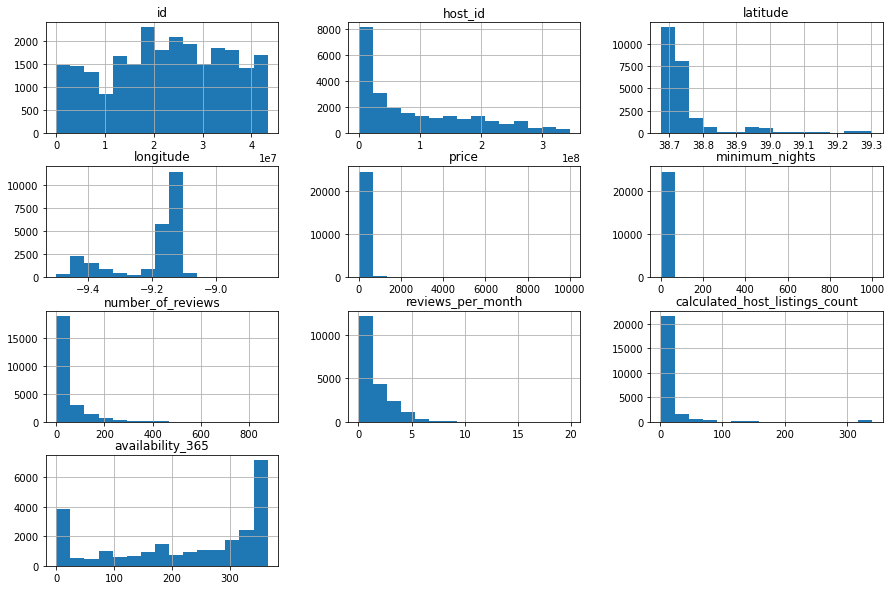

In [ ]:
# Histograma das variáveis numéricas de Lisboa

df_lisboa.hist(bins=15, figsize=(15,10));

### **Trabalhando os *outliers***

Pelas distribuições dos histogramas acima, não conseguimos em nenhum dos casos observar um certo "padrão" nos gráficos, como por exemplo nas variáveis `minimum_nights`, `price` e `calculated_host_listings_count`.

Isso ocorre visto que a distribuição dos resultados foi dificultada pela presença de ***outliers*** nos nossos *datasets*, ou seja, variáveis que estão excepcionalmente longe do padrão geral de cada variável. 

Temos duas maneiras de resolver este problema, como:

* Resumo estatístico por meio do método `describe()`;
* Plotar `boxplots` para a variável e observarmos os valores destacantes.

#### **Estatísticas descritivas**

**Porto**

Podemos ver nos números abaixo que 75% dos imóveis da amostra se encontram com os valores das diárias abaixo dos € 89.00, enquanto a média apresentada responde a € 85.26, sem a extração dos *outliers*. O valor máximo encontrado foi de € 10,000.00.

Ainda assim, no caso do Porto a retirada dos valores discrepantes ajudariam a encontrarmos resultados mais coerentes com a realidade do setor.

In [ ]:
# ver o resumo estatístico das variáveis numéricas

df_porto[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
          'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,11904.000000,11904.000000,11904.000000,10012.000000,11904.000000,11904.000000
mean,85.259913,2.623992,43.264029,1.686250,8.399698,246.258485
std,227.285050,8.927673,68.369793,1.659522,15.152223,123.906763
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,43.000000,1.000000,2.000000,0.360000,1.000000,161.000000
50%,60.000000,2.000000,15.000000,1.090000,3.000000,300.000000
75%,89.000000,2.000000,55.000000,2.610000,7.000000,354.000000
max,10000.000000,365.000000,640.000000,13.390000,89.000000,365.000000


**Lisboa**

Podemos ver nos números abaixo que 75% dos imóveis da amostra se encontram com os valores das diárias abaixo dos € 100.00, enquanto a média apresentada responde a € 110.74, o valor máximo encontrado foi de € 10,000.00. Ou seja, nossa análise fica prejudicada dada a discrepância dos valores.

Um caso em que um imóvel precise de pelo menos 1000 dias de locação antes de alugar também fere nossa análise.

Podemos ver então que os *outliers* estão alterando os valores das médias estudadas.

In [ ]:
# ver o resumo estatístico das variáveis numéricas

df_lisboa[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
          'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,24640.000000,24640.000000,24640.000000,20487.000000,24640.000000,24640.000000
mean,110.739732,3.294440,41.781291,1.459542,15.057224,225.239448
std,350.763230,15.970015,65.881125,1.461515,43.355842,132.790977
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,47.000000,1.000000,2.000000,0.320000,1.000000,118.000000
50%,69.000000,2.000000,14.000000,0.960000,3.000000,269.000000
75%,100.000000,3.000000,53.000000,2.210000,10.000000,349.000000
max,10000.000000,1000.000000,877.000000,19.890000,340.000000,365.000000


#### ***Boxplots***

Para definirmos o preço máximo e o número máximo de noites definidas, buscamos nos dois casos encontrar um valor comum que fosse pouco impactante. Procuramos assim, parear os dois casos buscando **padronizar** as duas cidades, em vista de poder comparar os dois resultados.

**Porto**

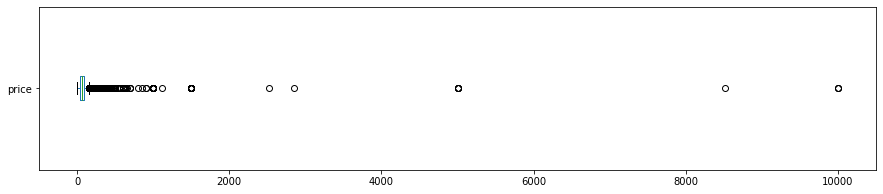

Preço: valores acima de 200:
204 entradas
1.7137%


In [ ]:
# Boxplot para `price`

df_porto.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# Valores acima de 30 dias
print("Preço: valores acima de 200:")
print("{} entradas".format(len(df_porto[df_porto.price > 300])))
print("{:.4f}%".format((len(df_porto[df_porto.price > 300]) / df_porto.shape[0])*100))

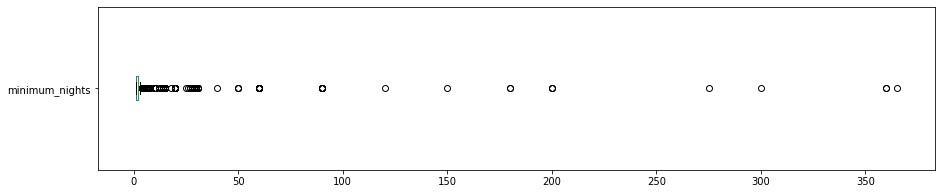

Preço: valores acima de 200:
37 entradas
0.3108%


In [ ]:
# Boxplot para `minimum_nights`

df_porto.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# Valores acima de 30 dias
print("Preço: valores acima de 200:")
print("{} entradas".format(len(df_porto[df_porto.minimum_nights > 30])))
print("{:.4f}%".format((len(df_porto[df_porto.minimum_nights > 30]) / df_porto.shape[0])*100))

**Lisboa**

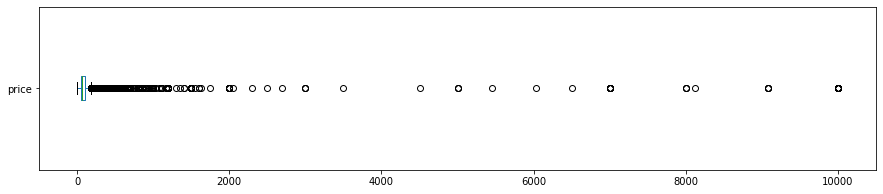

Preço: valores acima de 200:
870 entradas
3.5308%


In [ ]:
# Boxplot para `price`

df_lisboa.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# Valores acima de 30 dias
print("Preço: valores acima de 200:")
print("{} entradas".format(len(df_lisboa[df_lisboa.price > 300])))
print("{:.4f}%".format((len(df_lisboa[df_lisboa.price > 300]) / df_lisboa.shape[0])*100))


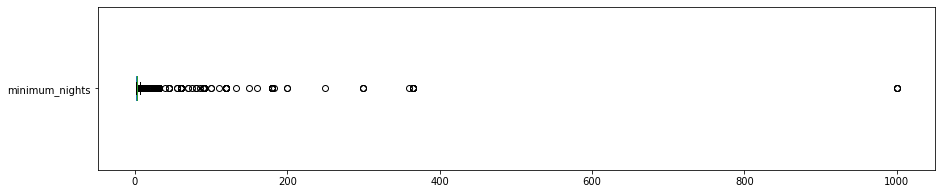

Preço: valores acima de 200:
100 entradas
0.4058%


In [ ]:
# Boxplot para `minimum_nights`

df_lisboa.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# Valores acima de 30 dias
print("Preço: valores acima de 200:")
print("{} entradas".format(len(df_lisboa[df_lisboa.minimum_nights > 30])))
print("{:.4f}%".format((len(df_lisboa[df_lisboa.minimum_nights > 30]) / df_lisboa.shape[0])*100))

#### **Histograma sem *outliers***

Agora que identificamos os *outliers* e separamos um valor considerável para trabalharmos as variáveis `price` e `minimum_nights` no nosso *DataFrame*, vamos reestabelecer nossas variáveis e plotar novamente nossos histogramas.

**Porto**

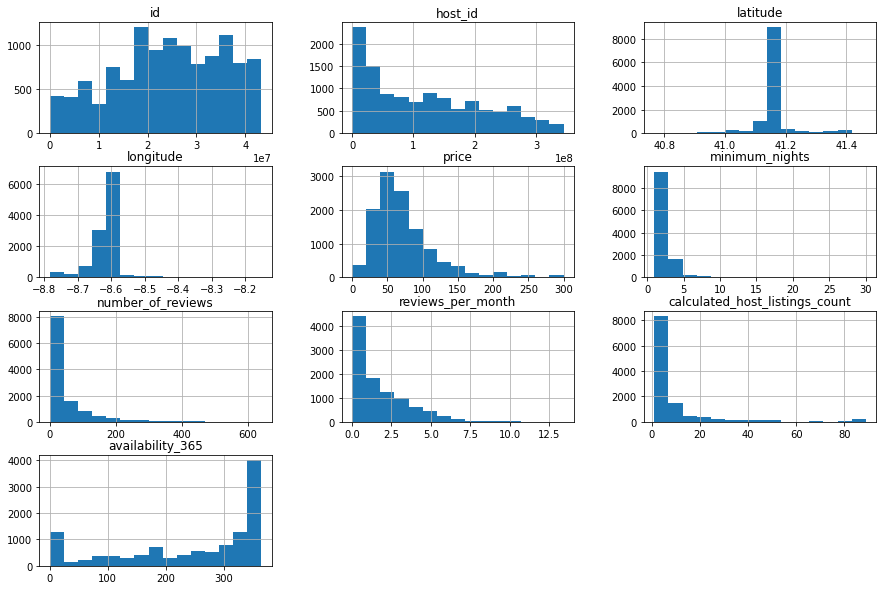

In [ ]:
# Removemos os outliers em um novo DataFrame

df_porto_clean = df_porto.copy()

# Variável preço

df_porto_clean.drop(df_porto_clean[df_porto_clean.price > 300].index, axis=0, inplace=True)

# Variável de mínimo de noites

df_porto_clean.drop(df_porto_clean[df_porto_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas

df_porto_clean.hist(bins=15, figsize=(15,10));

**Lisboa**

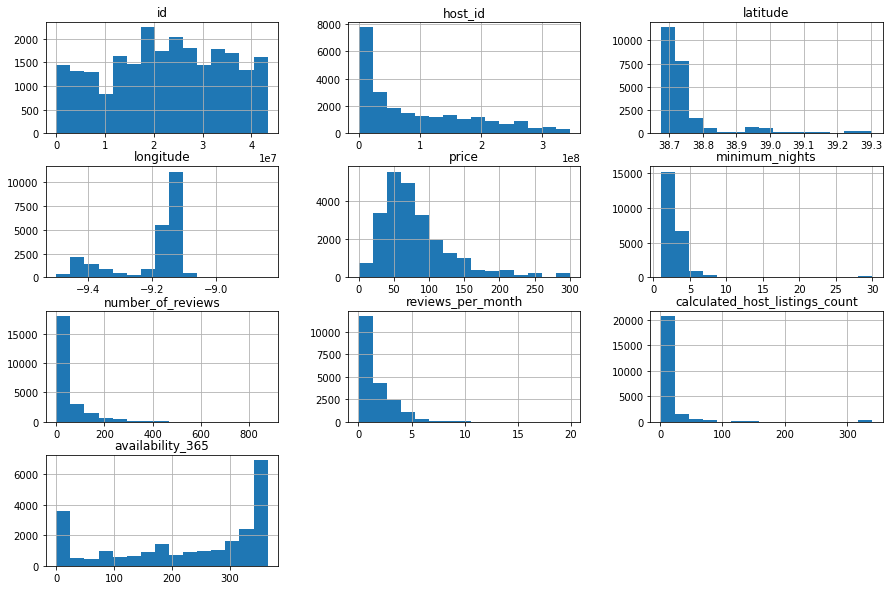

In [ ]:
# Removemos os outliers em um novo DataFrame

df_lisboa_clean = df_lisboa.copy()

# Variável preço

df_lisboa_clean.drop(df_lisboa_clean[df_lisboa_clean.price > 300].index, axis=0, inplace=True)

# Variável de mínimo de noites

df_lisboa_clean.drop(df_lisboa_clean[df_lisboa_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas

df_lisboa_clean.hist(bins=15, figsize=(15,10));

### **Correlação entre as variáveis**

Correlação significa a relação entre duas ou mais variáveis. No nosso caso, estamos buscando correlacionar as variáveis disponibilizadas pelo Airbnb nos dois casos estudados.

As correlações podem ser perfeitamente mensuradas, utilizando-se para isso a matriz de correlação, indicando com ela a intensidade dessas correlações. Além disso, utilizaremos um gráfico de "calor", para adentrarmos em uma análise mais visual. Veremos então:

* Uma matriz de correlação;
* Um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`.



**Porto**

In [ ]:
# Matriz de Correlação do Porto

corr_porto = df_porto_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr_porto)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.039529,-0.131838,-0.131097,0.003637,0.130013
minimum_nights,-0.039529,1.000000,-0.062100,-0.098627,-0.052791,-0.071630
number_of_reviews,-0.131838,-0.062100,1.000000,0.763824,-0.079644,0.057727
reviews_per_month,-0.131097,-0.098627,0.763824,1.000000,-0.075135,0.074400
calculated_host_listings_count,0.003637,-0.052791,-0.079644,-0.075135,1.000000,0.099248
availability_365,0.130013,-0.071630,0.057727,0.074400,0.099248,1.000000


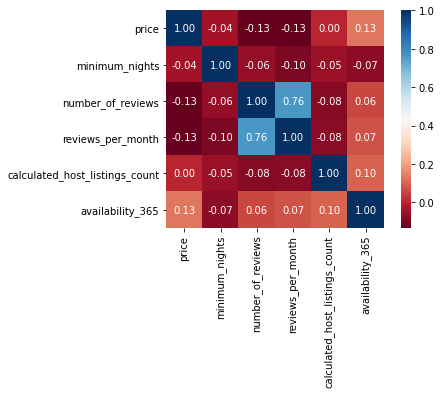

In [ ]:
# Heatmap do Porto

sns.heatmap(corr_porto, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

**Lisboa**

In [ ]:
# Matriz de Correlação de Lisboa

corr_lisboa = df_lisboa_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr_lisboa)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.019034,-0.105360,-0.100898,-0.004347,0.074717
minimum_nights,-0.019034,1.000000,-0.049242,-0.093804,-0.032240,-0.025172
number_of_reviews,-0.105360,-0.049242,1.000000,0.781075,-0.090073,0.080981
reviews_per_month,-0.100898,-0.093804,0.781075,1.000000,-0.099658,0.076513
calculated_host_listings_count,-0.004347,-0.032240,-0.090073,-0.099658,1.000000,0.046343
availability_365,0.074717,-0.025172,0.080981,0.076513,0.046343,1.000000


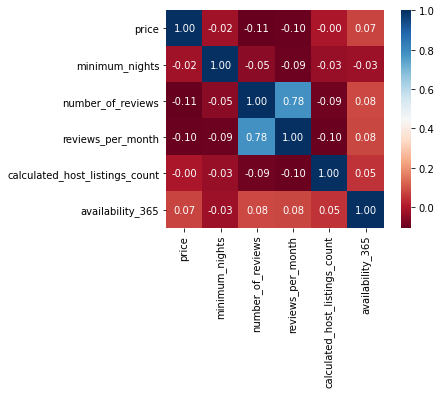

In [ ]:
# Heatmap de Lisboa

sns.heatmap(corr_lisboa, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Qual o tipo de imóvel mais alugado em cada região**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

**Porto**

In [ ]:
# Quantidade de cada tipo de imóvel disponível

df_porto_clean.room_type.value_counts()

Entire home/apt    9043
Private room       2216
Hotel room          248
Shared room         158
Name: room_type, dtype: int64

In [ ]:
# Porcentagem de cada tipo de imóvel disponível

df_porto_clean.room_type.value_counts() / df_porto_clean.shape[0]

Entire home/apt    0.775225
Private room       0.189970
Hotel room         0.021260
Shared room        0.013545
Name: room_type, dtype: float64

**Lisboa**

In [ ]:
# Quantidade de cada tipo de imóvel disponível

df_lisboa_clean.room_type.value_counts()

Entire home/apt    17223
Private room        5552
Hotel room           456
Shared room          441
Name: room_type, dtype: int64

In [ ]:
# Porcentagem de cada tipo de imóvel disponível

df_lisboa_clean.room_type.value_counts() / df_lisboa_clean.shape[0]

Entire home/apt    0.727568
Private room       0.234539
Hotel room         0.019263
Shared room        0.018630
Name: room_type, dtype: float64

### **Regiões mais populares**

**Porto**

In [ ]:
# ver a média da coluna `price`

df_porto_clean.neighbourhood_group.value_counts(ascending=False)[:10]

PORTO                   8522
VILA NOVA DE GAIA       1303
MATOSINHOS               506
VILA DO CONDE            278
PÓVOA DE VARZIM          263
ESPINHO                  144
GONDOMAR                 141
MAIA                     118
AROUCA                    94
SANTA MARIA DA FEIRA      72
Name: neighbourhood_group, dtype: int64

**Lisboa**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível

df_lisboa_clean.neighbourhood_group.value_counts(ascending=False)[:10]

Lisboa           17372
Cascais           2043
Sintra            1297
Mafra             1286
Oeiras             371
Lourinh            367
Torres Vedras      274
Loures             186
Amadora            143
Odivelas           110
Name: neighbourhood_group, dtype: int64

### **Localidades mais caras**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir das médias dos preços de locação.

**Porto**

In [ ]:
# ver preços por bairros, na média

df_porto_clean.groupby('neighbourhood_group').price.mean().sort_values(ascending=False)[:15]

neighbourhood_group
AROUCA                  113.691489
SANTO TIRSO             106.965517
VALE DE CAMBRA          100.930233
TROFA                    94.750000
PAREDES                  91.000000
VILA DO CONDE            75.071942
GONDOMAR                 74.872340
PÓVOA DE VARZIM          73.342205
ESPINHO                  71.111111
VILA NOVA DE GAIA        70.011512
PORTO                    69.517132
MATOSINHOS               65.610672
MAIA                     63.550847
VALONGO                  58.666667
SANTA MARIA DA FEIRA     56.402778
Name: price, dtype: float64

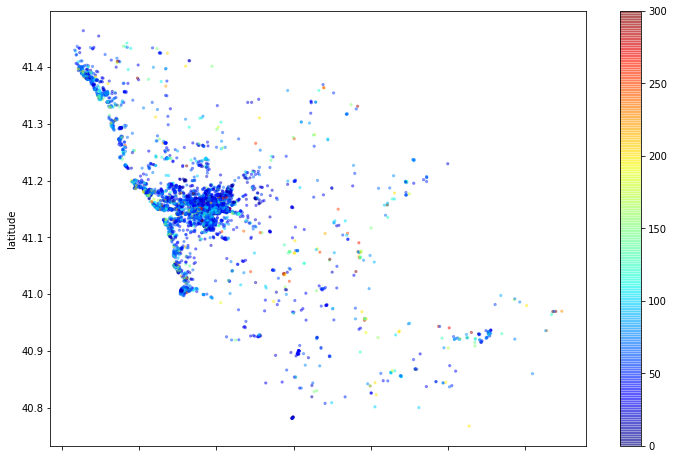

In [ ]:
# plotar os imóveis pela latitude-longitude

df_porto_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_porto_clean['price'], s=5,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

**Lisboa**


In [ ]:
# ver preços por bairros, na média

df_lisboa_clean.groupby('neighbourhood_group').price.mean().sort_values(ascending=False)[:15]

neighbourhood_group
Arruda Dos Vinhos        129.166667
Cascais                   90.645619
Lourinh                   88.675749
Mafra                     88.119751
Sintra                    86.976870
Torres Vedras             86.175182
Cadaval                   83.032787
Alenquer                  79.722222
Lisboa                    76.876698
Sobral De Monte Agrao     76.444444
Oeiras                    72.676550
Azambuja                  65.421053
Odivelas                  58.909091
Loures                    55.129032
Vila Franca De Xira       49.170213
Name: price, dtype: float64

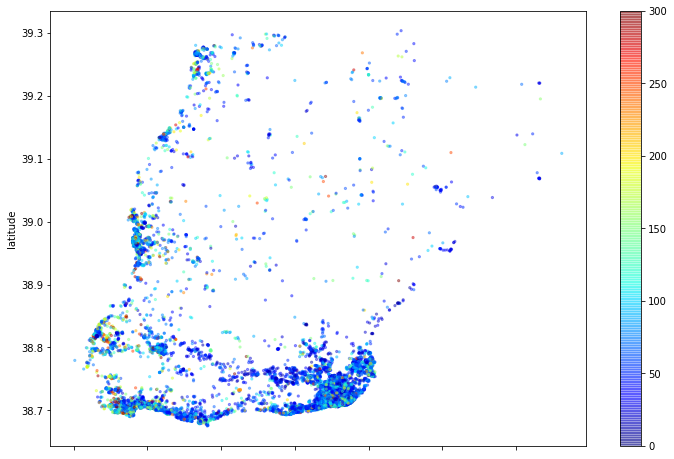

In [ ]:
# plotar os imóveis pela latitude-longitude

df_lisboa_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_lisboa_clean['price'], s=5,
              cmap=plt.get_cmap('jet'), figsize=(12,8));